The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


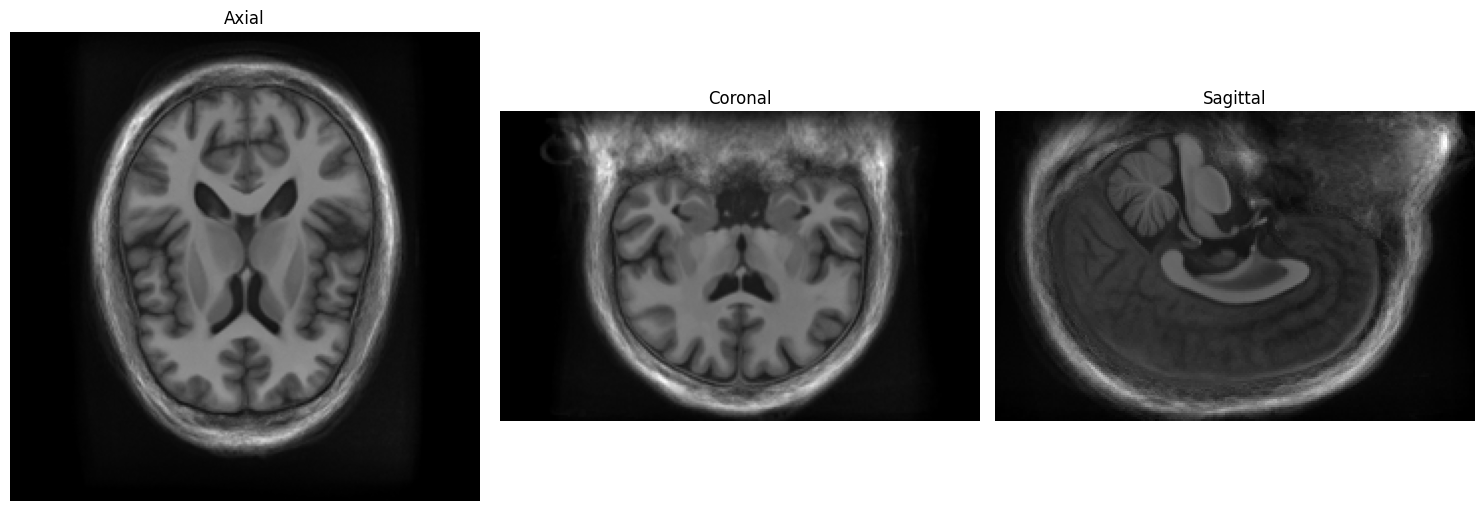

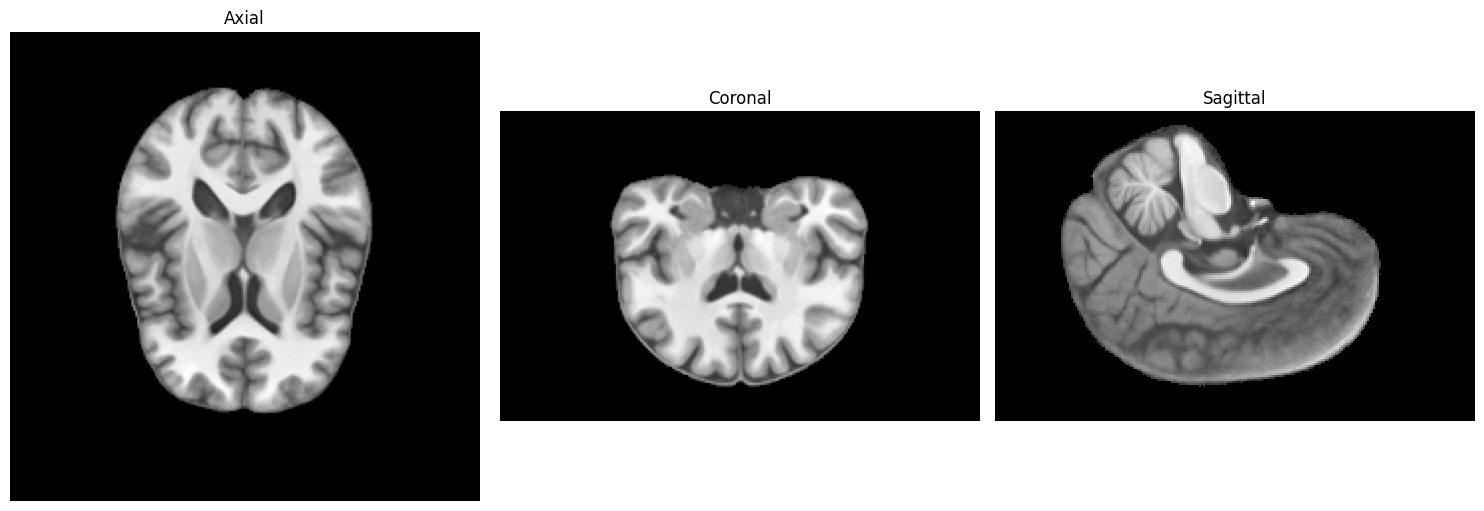

In [15]:
%load_ext autoreload
%autoreload 2

import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

def display_slices(mri_file_path: str):
    # Load the MRI scan using nibabel
    mri_data = nib.load(mri_file_path).get_fdata()
    mri_data = mri_data[:, :, :, 0]
    data_shape = mri_data.shape
    slice_fraction = 0.5

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axis_names = ["Sagittal", "Coronal", "Axial"]

    # For each axis, compute the slice and display it
    for axis in range(3):
        
        if axis == 0:
            half = int(data_shape[0] * slice_fraction)
            mri_sample_slice = mri_data.astype(np.float32)[half, :, :]
        elif axis == 1:
            half = int(data_shape[1] * slice_fraction)
            mri_sample_slice = mri_data.astype(np.float32)[:, half, :]
        elif axis == 2:
            half = int(data_shape[2] * slice_fraction)
            mri_sample_slice = mri_data.astype(np.float32)[:, :, half]
        axis = 2 - axis
        axes[axis].imshow(mri_sample_slice.T, cmap='gray')
        axes[axis].axis('off')  # Hide axes for better visualization
        axes[axis].set_title(axis_names[2 - axis])

    plt.tight_layout()
    plt.show()

# Example usage
# display_slices('path_to_your_mri_file.nii')


display_slices("../data/sri24/spgr_unstrip.nii")
display_slices("../data/sri24/spgr.nii")